
# Data
  **Police Department Incident Reports** : 2018 to Present: A documentation of a crime incident that happened from the past to the current time frame, the record includes a detailed time, date, and crime category.

#Fields
 **Incident Reports**:data contains 27 columns.
#Target field
crime_category – a categorical variable representing the type of crime (e.g., larceny, assault, vandalism, etc.).

#Number of attributes

**Incident Reports**: The original dataset contains 10 attributes, but only 7 were selected for modeling after preprocessing.
* Incident Category
* Analysis Neighborhood
* Police District
* Incident Date
* Incident Year
* Incident Day of Week
* Incident Time


#Prediction Goal:
Classify the type of crime based on when and where it occurred, and other structured features. This is a multi-class classification task.


In [1]:
import pandas as pd
from shapely.geometry import Point
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')





Mounted at /content/drive


In [2]:
crime_data_path = "/content/drive/Shareddrives/SF_Crime_Forecasting/Police_Department_Incident_Reports__2018_to_Present_20250429.csv"
crime_df = pd.read_csv(crime_data_path)
crime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952287 entries, 0 to 952286
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     952287 non-null  object 
 1   Incident Date                                         952287 non-null  object 
 2   Incident Time                                         952287 non-null  object 
 3   Incident Year                                         952287 non-null  int64  
 4   Incident Day of Week                                  952287 non-null  object 
 5   Report Datetime                                       952287 non-null  object 
 6   Row ID                                                952287 non-null  int64  
 7   Incident ID                                           952287 non-null  int64  
 8   Incident Number                             

In [3]:
crime_df.tail(10)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
952277,2025/03/15 12:30:00 AM,2025/03/15,00:30,2025,Saturday,2025/03/15 04:41:00 PM,146967806224,1469678,256026967,NaN,...,-122.501328,POINT (-122.50132751464844 37.771785736083984),9.0,NaN,NaN,NaN,NaN,NaN,4.0,8.0
952278,2025/03/18 08:16:00 PM,2025/03/18,20:16,2025,Tuesday,2025/03/18 08:29:00 PM,146977827195,1469778,250154732,250773292.0,...,-122.419182,POINT (-122.41918182373047 37.78310012817383),20.0,NaN,1.0,1.0,NaN,NaN,10.0,4.0
952279,2025/03/18 10:37:00 AM,2025/03/18,10:37,2025,Tuesday,2025/03/18 10:37:00 AM,146959719057,1469597,250153273,250771203.0,...,-122.417709,POINT (-122.41770935058594 37.784236907958984),20.0,NaN,1.0,NaN,NaN,NaN,10.0,5.0
952280,2024/05/14 12:00:00 AM,2024/05/14,00:00,2024,Tuesday,2025/03/18 12:00:00 AM,146961505053,1469615,240303660,NaN,...,-122.408401,POINT (-122.40840148925781 37.788291931152344),19.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
952281,2025/03/18 05:13:00 PM,2025/03/18,17:13,2025,Tuesday,2025/03/18 05:13:00 PM,146974805083,1469748,250110358,NaN,...,-122.432144,POINT (-122.43214416503906 37.780494689941406),97.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
952282,2025/03/18 11:49:00 AM,2025/03/18,11:49,2025,Tuesday,2025/03/18 11:49:00 AM,146972662050,1469726,250153427,250771454.0,...,-122.414909,POINT (-122.41490936279297 37.77447509765625),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
952283,2025/03/18 11:51:00 AM,2025/03/18,11:51,2025,Tuesday,2025/03/18 11:52:00 AM,146964007043,1469640,250119974,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952284,2025/03/18 06:40:00 AM,2025/03/18,06:40,2025,Tuesday,2025/03/18 04:41:00 PM,146971668030,1469716,250154130,250772559.0,...,-122.409882,POINT (-122.40988159179688 37.79844284057617),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
952285,2025/03/18 03:53:00 PM,2025/03/18,15:53,2025,Tuesday,2025/03/18 03:54:00 PM,146972163010,1469721,250154083,250772385.0,...,-122.405830,POINT (-122.40583038330078 37.76847457885742),33.0,NaN,NaN,NaN,2.0,NaN,9.0,3.0
952286,2025/03/18 10:55:00 AM,2025/03/18,10:55,2025,Tuesday,2025/03/18 11:02:00 AM,146960612030,1469606,250153314,250771265.0,...,-122.384087,POINT (-122.38408660888672 37.71966552734375),79.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0


#**DATA CLEANING & EXPLORAING SECTION**


#Let's select the column we need and see what cleaning do we need

In [4]:
# Make a copy of the original DataFrame
selected_df = crime_df.copy()

# Select only the desired columns (excluding Incident Year now)
selected_columns = [
    "Incident Category",
    "Analysis Neighborhood",
    "Police District",
    "Incident Date",
    "Incident Day of Week",
    "Incident Time"
]
selected_df = selected_df[selected_columns]

selected_df.head(10)

,Incident Category,Analysis Neighborhood,Police District,Incident Date,Incident Day of Week,Incident Time
0,Larceny Theft,NaN,Mission,2023/03/01,Wednesday,05:02
1,Recovered Vehicle,NaN,Out of SF,2023/03/14,Tuesday,18:44
2,Larceny Theft,NaN,Mission,2023/02/15,Wednesday,03:00
3,Larceny Theft,NaN,Central,2023/03/11,Saturday,15:00
4,Larceny Theft,NaN,Central,2023/03/13,Monday,07:30
5,Drug Violation,NaN,Out of SF,2023/03/16,Thursday,09:26
6,Assault,Potrero Hill,Bayview,2023/03/16,Thursday,17:30
7,Recovered Vehicle,NaN,Out of SF,2023/03/16,Thursday,13:49
8,Larceny Theft,NaN,Richmond,2023/03/16,Thursday,22:15
9,Larceny Theft,NaN,Central,2023/02/11,Saturday,14:00


In [5]:
selected_df.isna().sum()

,0
Incident Category,1154
Analysis Neighborhood,52168
Police District,0
Incident Date,0
Incident Day of Week,0
Incident Time,0


Transform the columns for better implementation, here is what I did.
- REPLACE the missing value for 'Analysis Neighborhood'
- SORTED the dataframe by  'year', 'month', 'day', 'hour'
- SPLIT the time frame into 'year', 'month', 'day', 'hour' columns
- REMOVED redundance columns
- REMOVED the row that is missing 'Incident Category'(Since the missing rows are only small portion of our data)



In [6]:
crime_df_cleaned = selected_df.copy()
#
# Replace missing neighborhood values with "Out of SF"
crime_df_cleaned["Analysis Neighborhood"] = crime_df_cleaned["Analysis Neighborhood"].fillna("Out of SF")
# Drop rows where 'Incident Category' is missing
crime_df_cleaned = crime_df_cleaned.dropna(subset=["Incident Category"])
# Sort by full date and time
# Create a datetime column
numerify_crime_df_cleaned = crime_df_cleaned.copy()
numerify_crime_df_cleaned['incident_datetime'] = pd.to_datetime(
    numerify_crime_df_cleaned['Incident Date'] + ' ' + numerify_crime_df_cleaned['Incident Time'], errors='coerce'
)
numerify_crime_df_cleaned = numerify_crime_df_cleaned.drop("Incident Time", axis=1)
numerify_crime_df_cleaned['hour'] = numerify_crime_df_cleaned["incident_datetime"].dt.hour
numerify_crime_df_cleaned['day'] = numerify_crime_df_cleaned["incident_datetime"].dt.day
numerify_crime_df_cleaned['month'] = numerify_crime_df_cleaned["incident_datetime"].dt.month
numerify_crime_df_cleaned['year'] = numerify_crime_df_cleaned["incident_datetime"].dt.year

numerify_crime_df_cleaned = numerify_crime_df_cleaned.sort_values(by=["incident_datetime" ])


# STEP 6: Encode all categorical columns numerically
# # One-hot encode the categorical columns
categorical_cols = ['Incident Category', 'Analysis Neighborhood', 'Police District', 'Incident Day of Week']

# # Replace spaces with underscores in all column names
# # Make all column names lowercase and replace spaces/special characters
numerify_crime_df_cleaned.columns = (
    numerify_crime_df_cleaned.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
)
numerify_crime_df_cleaned = numerify_crime_df_cleaned.drop("incident_date", axis=1)
numerify_crime_df_cleaned['year'].value_counts().sort_index()
numerify_crime_df_cleaned.tail()



,incident_category,analysis_neighborhood,police_district,incident_day_of_week,incident_datetime,hour,day,month,year
11633,Larceny Theft,Bernal Heights,Ingleside,Monday,2025-04-28 20:59:00,20,28,4,2025
11816,Larceny Theft,Bernal Heights,Ingleside,Monday,2025-04-28 21:05:00,21,28,4,2025
11805,Larceny Theft,Bernal Heights,Ingleside,Monday,2025-04-28 21:06:00,21,28,4,2025
11930,Larceny Theft,South of Market,Tenderloin,Monday,2025-04-28 21:56:00,21,28,4,2025
12103,Non-Criminal,Mission,Mission,Monday,2025-04-28 22:34:00,22,28,4,2025


In [7]:
# Create proper aggregation for regression task
crime_count_df = numerify_crime_df_cleaned.copy()
crime_counts = numerify_crime_df_cleaned.groupby(['year', 'month', 'day', 'hour']).size().reset_index(name='crime_count')
crime_count_df = crime_count_df.merge(crime_counts, on=['year', 'month', 'day', 'hour'], how='left')
crime_count_df.tail()


,incident_category,analysis_neighborhood,police_district,incident_day_of_week,incident_datetime,hour,day,month,year,crime_count
951128,Larceny Theft,Bernal Heights,Ingleside,Monday,2025-04-28 20:59:00,20,28,4,2025,5
951129,Larceny Theft,Bernal Heights,Ingleside,Monday,2025-04-28 21:05:00,21,28,4,2025,3
951130,Larceny Theft,Bernal Heights,Ingleside,Monday,2025-04-28 21:06:00,21,28,4,2025,3
951131,Larceny Theft,South of Market,Tenderloin,Monday,2025-04-28 21:56:00,21,28,4,2025,3
951132,Non-Criminal,Mission,Mission,Monday,2025-04-28 22:34:00,22,28,4,2025,1




#**DATA EXPLORING**


Seem Cleaned!

In [8]:
crime_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951133 entries, 0 to 951132
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   incident_category      951133 non-null  object        
 1   analysis_neighborhood  951133 non-null  object        
 2   police_district        951133 non-null  object        
 3   incident_day_of_week   951133 non-null  object        
 4   incident_datetime      951133 non-null  datetime64[ns]
 5   hour                   951133 non-null  int32         
 6   day                    951133 non-null  int32         
 7   month                  951133 non-null  int32         
 8   year                   951133 non-null  int32         
 9   crime_count            951133 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int64(1), object(4)
memory usage: 58.1+ MB


Let's try to perform Anlsisy the correlation between time, incident district, and Polic District, but first we need to do some encoding

In [9]:
crime_count_df.nunique()


,0
incident_category,49
analysis_neighborhood,42
police_district,11
incident_day_of_week,7
incident_datetime,454889
hour,24
day,31
month,12
year,8
crime_count,86


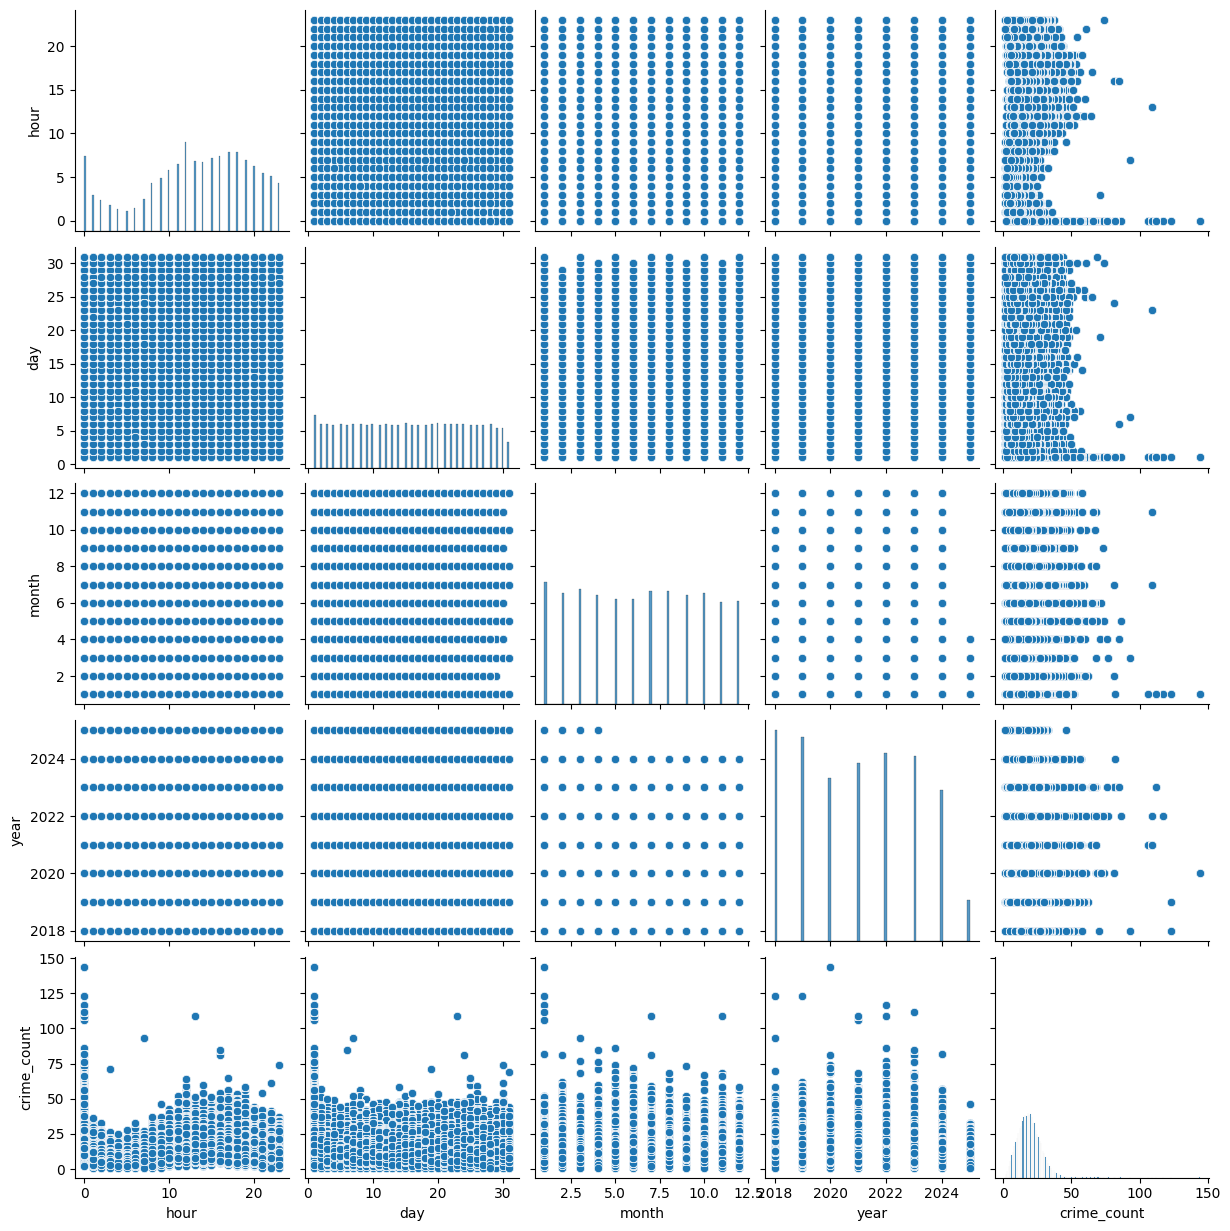

In [10]:
sns.pairplot(crime_count_df)

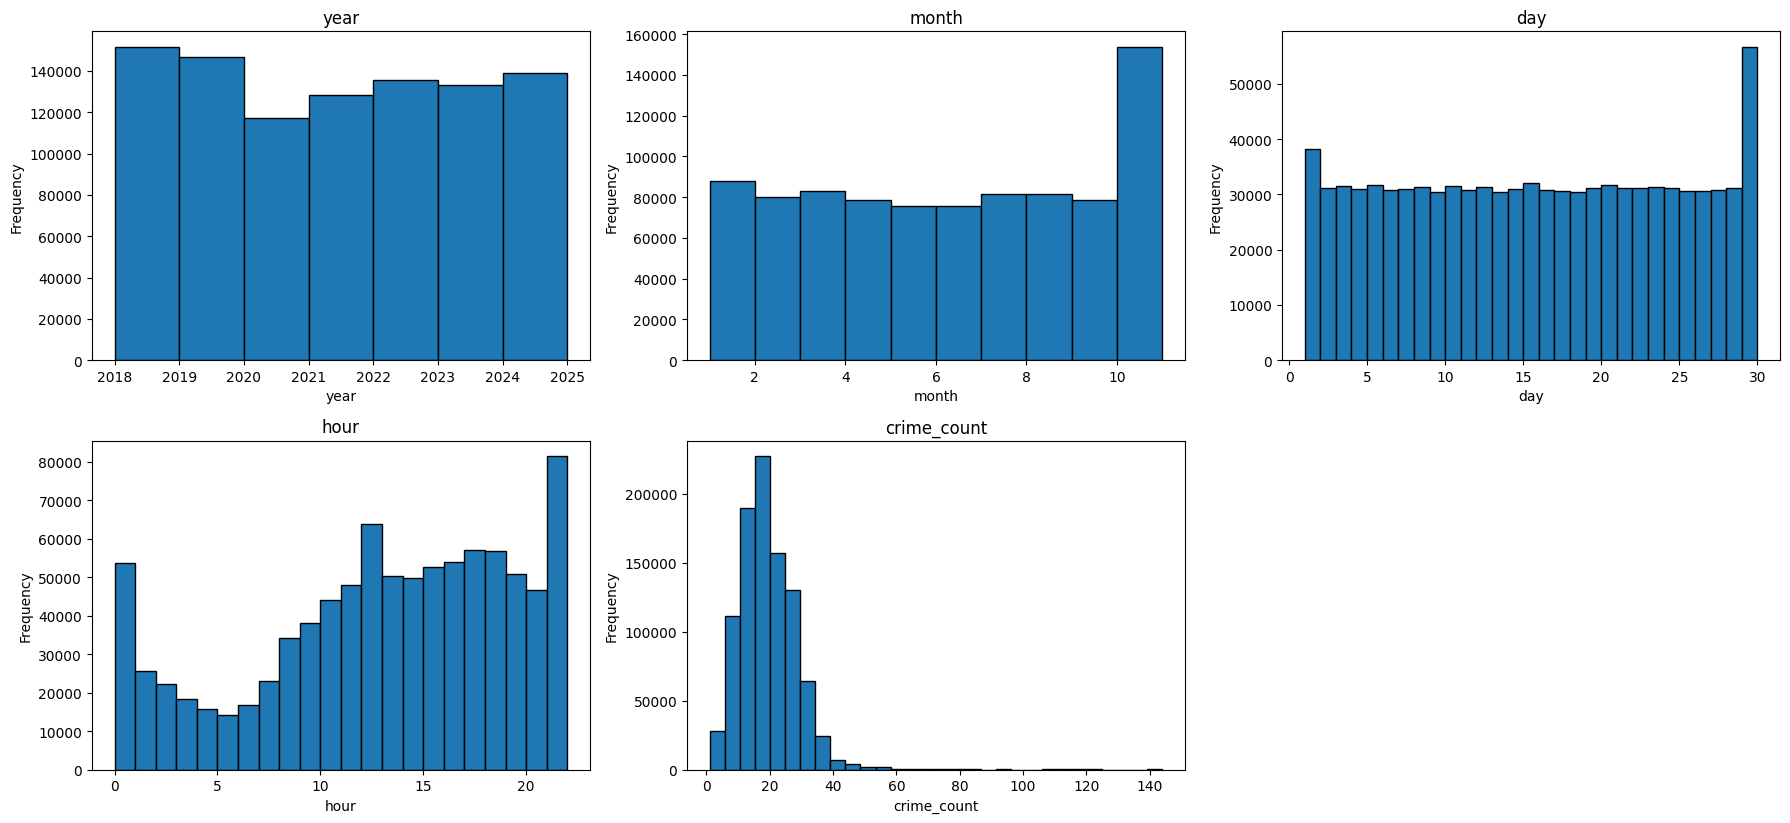

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Select the numeric columns you want to plot
columns_to_plot = ['year', 'month', 'day', 'hour', 'crime_count']

# Define custom bins for each column
custom_bins = {
    'year': range(crime_count_df['year'].min(), crime_count_df['year'].max() + 1),
    'month': range(1, 12),           # 1–12
    'day': range(1, 31),             # 1–31
    'hour': range(0, 23),            # 0–24
    'crime_count': 30,        # use default bin count

}

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    bins = custom_bins.get(col, 30)
    ax.hist(crime_count_df[col], bins=bins, edgecolor='black')
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


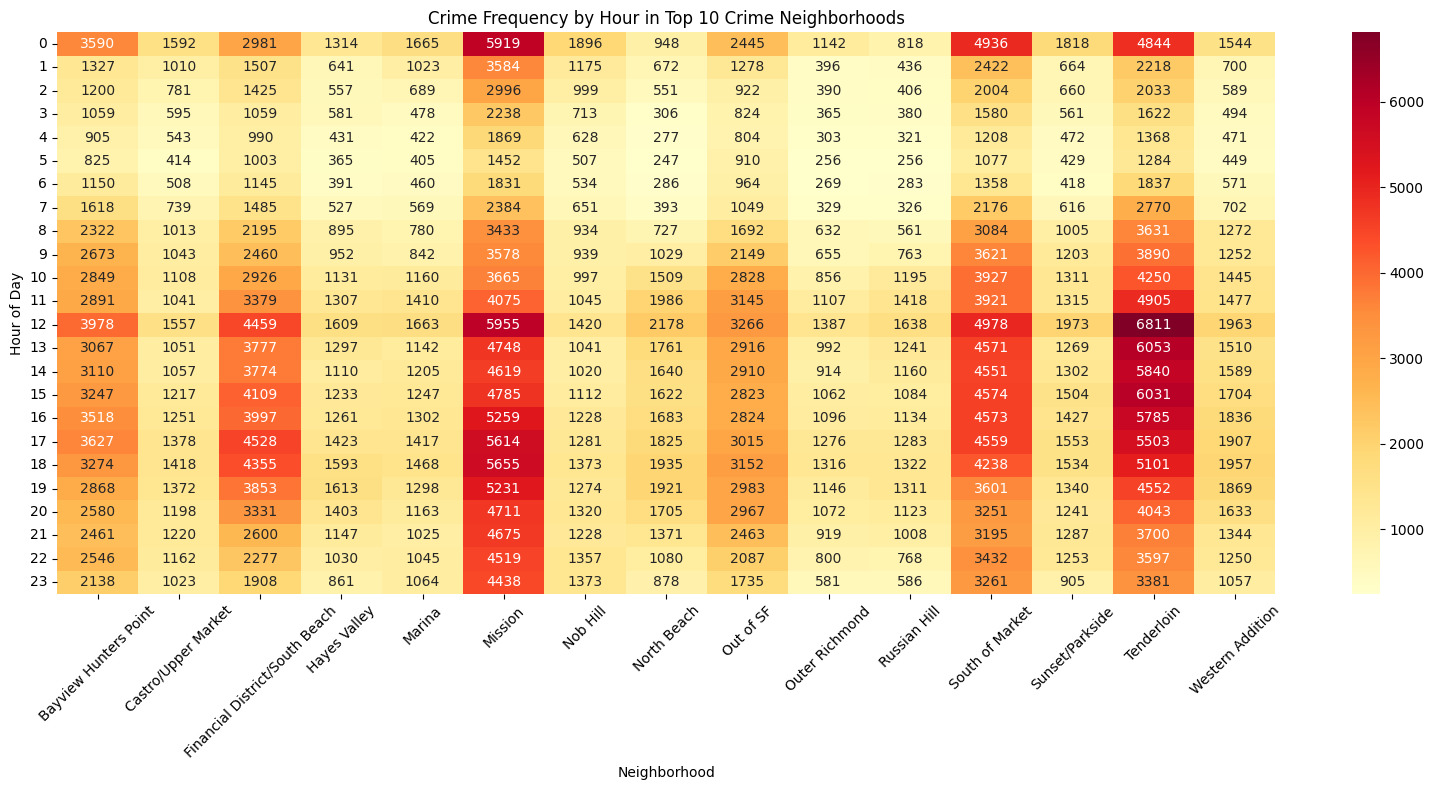

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get the top 10 most frequent neighborhoods
top_neighborhoods = (
    crime_count_df['analysis_neighborhood']
    .value_counts()
    .head(15)
    .index
)

# Step 2: Filter the original DataFrame to include only those neighborhoods
top_crime_df = crime_count_df[crime_count_df['analysis_neighborhood'].isin(top_neighborhoods)]

# Step 3: Create a pivot table: rows = hour, columns = top neighborhoods, values = crime count
pivot = top_crime_df.pivot_table(
    index='hour',
    columns='analysis_neighborhood',
    values='incident_category',  # We're just counting rows
    aggfunc='count',
    fill_value=0
)

# Step 4: Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='d')
plt.title("Crime Frequency by Hour in Top 10 Crime Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Hour of Day")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#**DATA TRANFORMAING**


Spliting the data into 60, 20, 20

In [13]:
# Create proper aggregation for regression task
hourly_counts = numerify_crime_df_cleaned.groupby(['year', 'month', 'day', 'hour']).size().reset_index(name='crime_count')

# Add day of week
hourly_counts['date'] = pd.to_datetime(hourly_counts[['year', 'month', 'day']])
hourly_counts['day_of_week'] = hourly_counts['date'].dt.dayofweek

# Create cyclical features
hourly_counts['hour_sin'] = np.sin(2 * np.pi * hourly_counts['hour']/24)
hourly_counts['hour_cos'] = np.cos(2 * np.pi * hourly_counts['hour']/24)
hourly_counts['day_of_week_sin'] = np.sin(2 * np.pi * hourly_counts['day_of_week']/7)
hourly_counts['day_of_week_cos'] = np.cos(2 * np.pi * hourly_counts['day_of_week']/7)


# **TRAINING**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Set features (X) and target (y)
# Exclude incident_category and incident_datetime (not needed here)
# EXCLUDE count_crime_hourly from X
regression_features = crime_count_df.drop(columns=['incident_category', 'incident_datetime', 'crime_count'])
target = crime_count_df['crime_count']

# 2. Split data into training, validation, test
X_temp, X_test, y_temp, y_test = train_test_split(regression_features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 60/20/20

# 3. Column types for preprocessing
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'int32']).columns.tolist()

# 4. Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# 5. Linear Regression pipeline
linreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 6. Train model
linreg_pipeline.fit(X_train, y_train)

# 7. Validate model
y_pred = linreg_pipeline.predict(X_val)

# Metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RF MAE: {mae:.2f}")
print(f"RF RMSE: {rmse:.2f}")
print(f"RF R²: {r2:.3f}")

RF MAE: 6.43
RF RMSE: 8.95
RF R²: 0.075


In [15]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.scatter(y_val, y_pred, alpha=0.3)
# plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # ideal line
# plt.xlabel('Actual Crime Count (Hourly)')
# plt.ylabel('Predicted Crime Count')
# plt.title('Predicted vs. Actual Crime Counts')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# residuals = y_val - y_pred

# plt.figure(figsize=(8, 6))
# plt.scatter(y_pred, residuals, alpha=0.3)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Predicted Crime Count')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Plot')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#  Reduce to top 10 neighborhoods to limit memory
top_neighborhoods = crime_count_df['analysis_neighborhood'].value_counts().head(10).index
reduced_df = crime_count_df[crime_count_df['analysis_neighborhood'].isin(top_neighborhoods)].copy()

#  Features and target
X = reduced_df.drop(columns=['incident_category', 'incident_datetime', 'crime_count'])
y = reduced_df['crime_count']

#  Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Preprocessing pipeline (unchanged)
numeric_features = ['hour', 'day', 'month', 'year']
categorical_features = ['analysis_neighborhood', 'police_district', 'incident_day_of_week']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

#  Lightweight Random Forest (smaller model)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=30, max_depth=10, random_state=42))
])

#  Train model
rf_model.fit(X_train, y_train)

# 📈 Predict and evaluate
y_pred = rf_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"RF MAE: {mae:.2f}")
print(f"RF RMSE: {rmse:.2f}")
print(f"RF R²: {r2:.3f}")



RF MAE: 4.53
RF RMSE: 6.03
RF R²: 0.583


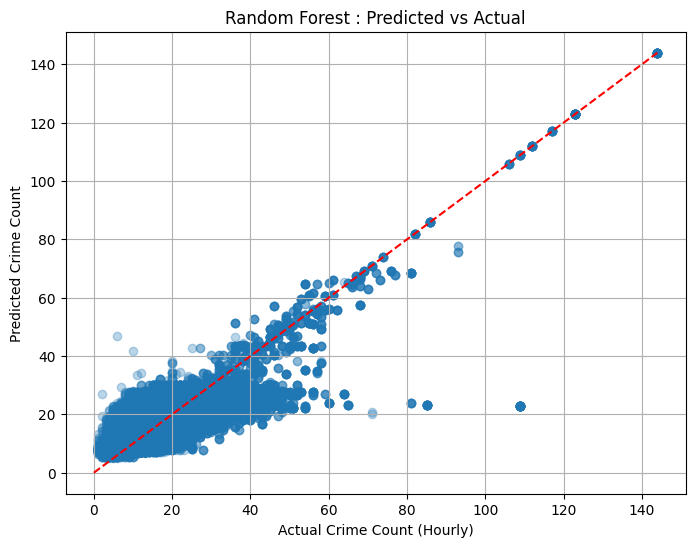

In [17]:
# 📊 Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([0, max(y_val)], [0, max(y_val)], 'r--')
plt.xlabel("Actual Crime Count (Hourly)")
plt.ylabel("Predicted Crime Count")
plt.title("Random Forest : Predicted vs Actual")
plt.grid(True)
plt.show()

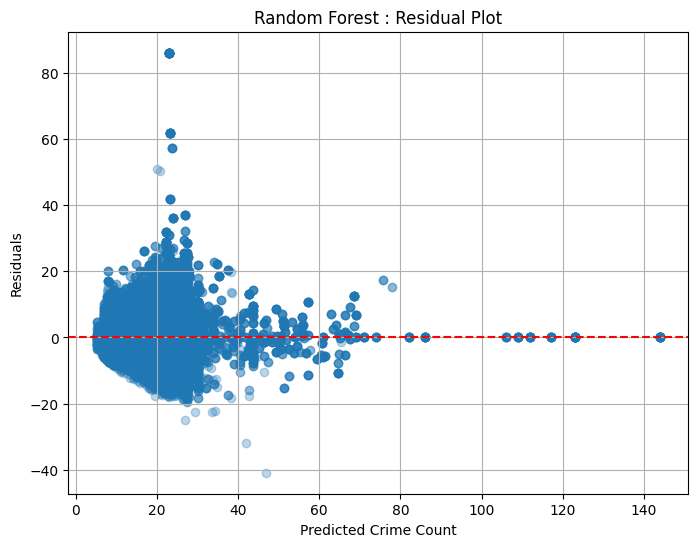

In [18]:
# 📉 Residual plot
residuals = y_val - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Crime Count")
plt.ylabel("Residuals")
plt.title("Random Forest : Residual Plot")
plt.grid(True)
plt.show()

RF MAE: 4.58
RF RMSE: 6.10
RF R²: 0.573


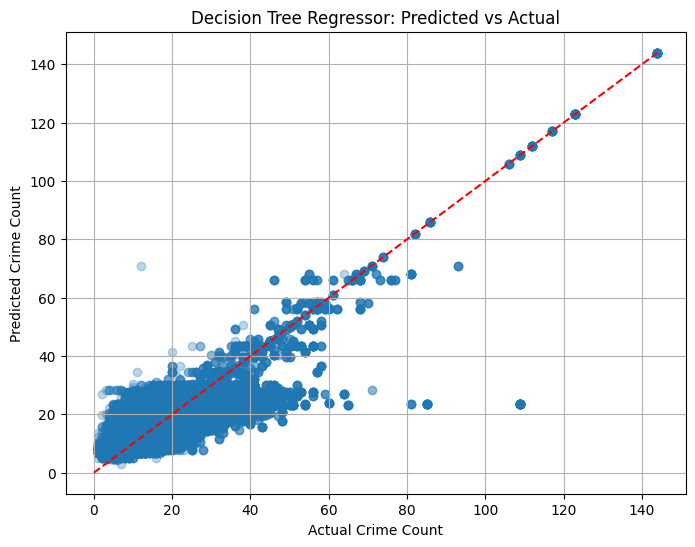

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Reuse the reduced_df with top 10 neighborhoods
X = reduced_df.drop(columns=['incident_category', 'incident_datetime', 'crime_count'])
y = reduced_df['crime_count']

# Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = ['hour', 'day', 'month', 'year']
categorical_features = ['analysis_neighborhood', 'police_district', 'incident_day_of_week']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Decision Tree model
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Train
tree_pipeline.fit(X_train, y_train)

# Predict
y_pred = tree_pipeline.predict(X_val)

# Evaluate
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"RF MAE: {mae:.2f}")
print(f"RF RMSE: {rmse:.2f}")
print(f"RF R²: {r2:.3f}")

# Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([0, max(y_val)], [0, max(y_val)], 'r--')
plt.xlabel("Actual Crime Count")
plt.ylabel("Predicted Crime Count")
plt.title("Decision Tree Regressor: Predicted vs Actual")
plt.grid(True)
plt.show()


In [22]:
print(crime_df.columns.tolist())


['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Report Type Description', 'Filed Online', 'Incident Code', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'CNN', 'Police District', 'Analysis Neighborhood', 'Supervisor District', 'Supervisor District 2012', 'Latitude', 'Longitude', 'Point', 'Neighborhoods', 'ESNCAG - Boundary File', 'Central Market/Tenderloin Boundary Polygon - Updated', 'Civic Center Harm Reduction Project Boundary', 'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas', 'Current Supervisor Districts', 'Current Police Districts']


In [25]:
# 1. Import libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# 2. Filter top 5 crime categories (to avoid imbalance and memory issues)
top_5_crimes = crime_count_df['incident_category'].value_counts().head(5).index
class_df = crime_count_df[crime_count_df['incident_category'].isin(top_5_crimes)].copy()

# 3. Define features and target
X = class_df.drop(columns=['incident_category', 'incident_datetime', 'crime_count'])
y = class_df['incident_category']

# 4. Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Set up preprocessing
numeric_features = ['hour', 'day', 'month', 'year']
categorical_features = ['analysis_neighborhood', 'police_district', 'incident_day_of_week']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 6. Build classification pipeline with Random Forest
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42))
])

# 7. Train the model
clf_pipeline.fit(X_train, y_train)

# 8. Make predictions
y_pred = clf_pipeline.predict(X_val)


In [24]:
# 9. Confusion Matrix
labels = clf_pipeline.classes_
cm = confusion_matrix(y_val, y_pred, labels=labels)

# 10. Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Crime Category")
plt.ylabel("True Crime Category")
plt.title("Confusion Matrix: Crime Category Classification")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 11. Print classification report
print("Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=labels))


NameError: name 'clf_pipeline' is not defined